,2017Sept,2016Sept,2015Sept,2014Sept,2013Sept,2012Sept
14,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'MingLiU-98' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'MingLiU-98' not found in PostScript font database”

,Item,2017Sept,2016Sept,Type,SubType
1,Cash and cash equivalents,20289,20484,Assets,Current Assets
2,Short-term marketable securities,53892,46671,Assets,Current Assets
3,"Accounts receivable, less allowances",17874,15754,Assets,Current Assets
4,Inventories,4855,2132,Assets,Current Assets
5,Vendor non-trade receivables,17799,13545,Assets,Current Assets
6,Other current assets,13936,8283,Assets,Current Assets
8,Long-term marketable securities,194714,170430,Assets,Non-Current Assets
9,"Property, plant and equipment, net",33783,27010,Assets,Non-Current Assets
10,Goodwill,5717,5414,Assets,Non-Current Assets
11,"Acquired intangible assets, net",2298,3206,Assets,Non-Current Assets


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'MingLiU-98' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'MingLiU-98' not found in PostScript font database”

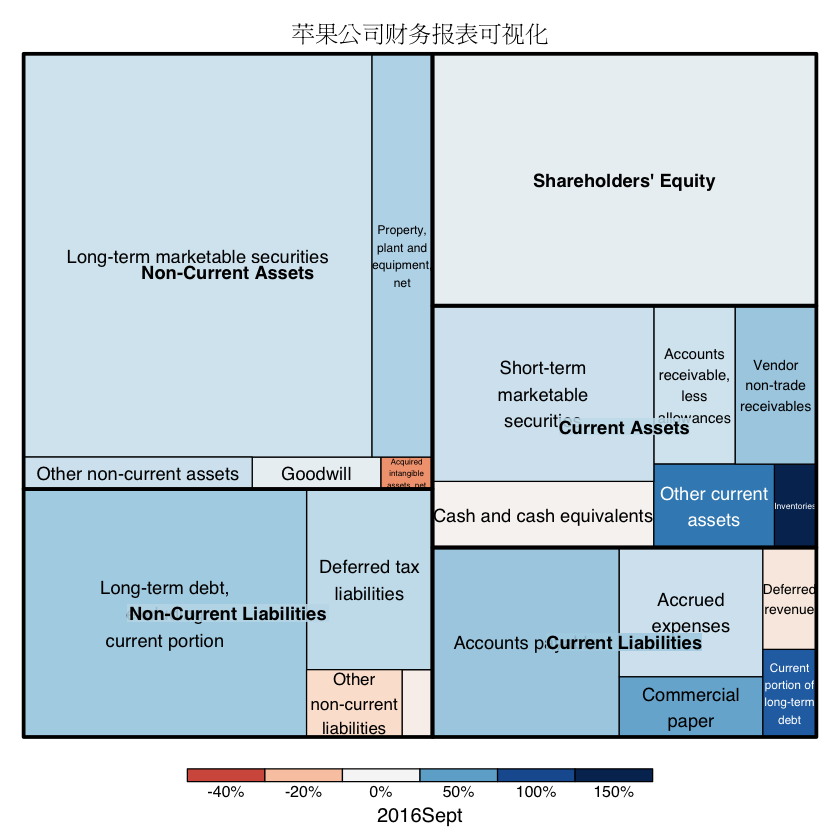

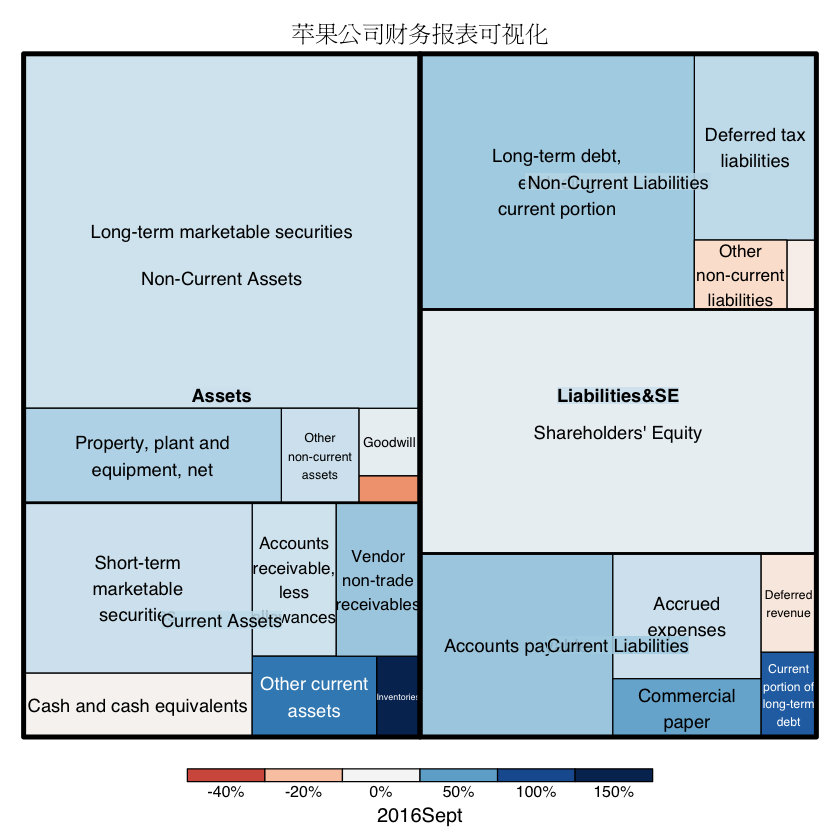

In [8]:
#Q4a-------------对此题的解释已在代码旁以注释形式给出-----------------------

setwd('D:/BA/Homework/HW01') 
Apple_Assets <- read.csv('Apple_Assets.csv', stringsAsFactors= FALSE)
colnames(Apple_Assets)<- c('Item','2017Sept','2016Sept','2015Sept','2014Sept','2013Sept','2012Sept')
#给Apple_Assets赋予列名

replaceCommas<-function(x){ x<-as.numeric(gsub("\\,", "", x))} #将字符串里面的逗号去掉，然后转换成数值型。
N_cols = ncol(Apple_Assets)
Apple_Assets[,2:N_cols] = apply(Apple_Assets[,2:N_cols],2,replaceCommas)
attach(Apple_Assets)
RowN_to_change = which(Item=='Current assets')
RowN_begin = which (Item=='Cash and cash equivalents')
Apple_Assets[RowN_to_change, 2:N_cols] = sapply(Apple_Assets[RowN_begin:(RowN_to_change-1),2:N_cols],sum)
detach(Apple_Assets)
#去掉数据的逗号，并将数据转换为数值型变量

MySum <- function (df, checkrow, begin, sumitem) {
  attach(df)
  N_cols = ncol(df)
  RowN_to_change = which(checkrow==sumitem)
  RowN_begin = which (checkrow==begin)
  df[RowN_to_change, 2:N_cols] = sapply(df[RowN_begin:(RowN_to_change-1),2:N_cols],sum)
  detach(df)
  return(df)
}
Apple_Assets = MySum(Apple_Assets, Item, "Cash and cash equivalents", "Current assets")
Apple_Assets = MySum(Apple_Assets, Item, "Long-term marketable securities", "Non-current assets")
#从Long-trem marketable securities 到Other non-current assets求和，并将和赋予Non-current assets行


attach(Apple_Assets)
RowN_to_change = which(Item=='Total assets')
RowN_S1 = which (Item=='Current assets')
RowN_S2 = which (Item=='Non-current assets')
Apple_Assets[RowN_to_change, 2:N_cols] = sapply(Apple_Assets[c(RowN_S1,RowN_S2),2:N_cols],sum)
detach(Apple_Assets)
#将Current assets 和Non-current assets 两行求和，并将和赋予Total assets

SumTwoItems <- function (df, checkrow, sumrow, item1, item2) {
  attach(df)
  RowN_to_change = which(checkrow==sumrow)
  RowN_S1 = which (checkrow==item1)
  RowN_S2 = which (checkrow==item2)
  df[RowN_to_change, 2:N_cols] = sapply(df[c(RowN_S1,RowN_S2),2:N_cols],sum)
  detach(df)
  return(df)
}
Apple_Assets = SumTwoItems(Apple_Assets, Item, "Total assets","Current assets","Non-current assets")
#设置一个函数，将某两行的各列数据分别求和，再将数据赋值到另外一行的相应列中
#利用此函数将Current assets 和Non-current assets 两行求和，并将和赋予Total assets

Apple_Liabilities <- read.csv('Apple_Liabilities.csv', stringsAsFactors= FALSE)
colnames(Apple_Liabilities)<- c('Item','2017Sept','2016Sept','2015Sept','2014Sept','2013Sept','2012Sept')
#给Apple_Liabilities赋予列名

N_cols = ncol(Apple_Liabilities)
Apple_Liabilities[,2:N_cols] = apply(Apple_Liabilities[,2:N_cols],2,replaceCommas)
#去掉数据的逗号，并将数据转换为数值型变量

Apple_Liabilities = MySum(Apple_Liabilities, Item, "Accounts payable", "Current liabilities")
#从Accounts payable到Current portion of long-term debt行求和，并将和赋予Current liabilities行

Apple_Liabilities = MySum(Apple_Liabilities, Item, "Deferred revenue, non-current", "Non-current liabilities")
#从Deferred revenue到Other non-current liabilities求和，并将和赋予Non-current liabilities 行

Apple_Liabilities = MySum(Apple_Liabilities, Item, "Common stock and additional paid-in capital, $0.00001 par value", "Shareholders' equity")
#从Common stock and additional paid-in capital, $0.00001 par value到Accumulated other comprehensive income (loss)行求和，并将和赋予Shareholders' equity行

Apple_Liabilities = SumTwoItems(Apple_Liabilities, Item, "Total liabilities", "Current liabilities","Non-current liabilities")
#将Current liabilities 和Non-current liabilities’两行求和，并将和赋予Total liabilities

Apple_Liabilities = SumTwoItems(Apple_Liabilities, Item, "Total liabilities and shareholders' equity", "Total liabilities",
                                "Shareholders' equity")
#将Total liabilities和Shareholders' equity两行求和，并将和赋予Total liabilities and shareholders' equity行

Apple <- rbind(Apple_Assets, Apple_Liabilities)
#将Apple_Assets和Apple_Liabilities两个表格横向连接并赋予Apple.

#MySum函数的作用：从begin行到sumitem的前一行求和，并将和赋予sumitem行。
#SumTwoItems函数的作用：对item1和item2行求和，并将和赋予sumrow行。


#Q4b-----------对此题的解释已在代码旁以注释形式给出----------------------------

attach(Apple)
Apple[Item=='Total assets',2:7]==Apple[Item=="Total liabilities and shareholders' equity",2:7]
detach(Apple)
#分别将Total assests行的第2列到第7列与Total liabilities and shareholders行的第2列到第7列相比较是否相等，结果为6个均相等


#Q4c-----------对此题的解释已在代码下方以注释形式给出----------------------------

attach(Apple)
RowN_Type = which (Item=='Current assets')
AppleTree <- Apple[1:(RowN_Type-1), 1:3]
AppleTree <- cbind(AppleTree, data.frame(Type=rep('Current Assets', (RowN_Type-1))))
detach(Apple)

attach(Apple)
RowN_Type1 = which (Item=='Current assets')
RowN_Type2 = which (Item=='Non-current assets')
ATree <- Apple[(1+RowN_Type1):(RowN_Type2-1), 1:3]
ATree <- cbind(ATree, data.frame(Type=rep('Non-Current Assets', (RowN_Type2-RowN_Type1-1))))
AppleTree <- rbind(AppleTree, ATree)
detach(Apple)

attach(Apple)
RowN_Type1 = which (Item=='Total assets')
RowN_Type2 = which (Item=='Current liabilities')
ATree <- Apple[(1+RowN_Type1):(RowN_Type2-1), 1:3]
ATree <- cbind(ATree, data.frame(Type=rep('Current Liabilities', (RowN_Type2-RowN_Type1-1))))
AppleTree <- rbind(AppleTree, ATree)
detach(Apple)

attach(Apple)
RowN_Type1 = which (Item=='Current liabilities')
RowN_Type2 = which (Item=='Non-current liabilities')
ATree <- Apple[(1+RowN_Type1):(RowN_Type2-1), 1:3]
ATree <- cbind(ATree, data.frame(Type=rep('Non-Current Liabilities', (RowN_Type2-RowN_Type1-1))))
AppleTree <- rbind(AppleTree, ATree)
detach(Apple)

attach(Apple)
RowN_Type1 = which (Item=='Accumulated other comprehensive income (loss)')
RowN_Type2 = which (Item=="Total liabilities and shareholders' equity")
ATree <- Apple[(1+RowN_Type1):(RowN_Type2-1), 1:3]
ATree <- cbind(ATree, data.frame(Type=rep("Shareholders' Equity", (RowN_Type2-RowN_Type1-1))))
AppleTree <- rbind(AppleTree, ATree)
detach(Apple)

#分别取出Current Assests,Non-Current Assets,Current Liabilities,Non-Current Liabilities和Shareholders’Equity类型的行，所有行均只取第一列到第三列，并赋予Type列，将其横向连接。

#Q4d-----------代码如下-------------------------------------


library(treemap)
treemap(AppleTree,index=c("Type","Item"),vSize="2017Sept",vColor="2016Sept",type="comp",
        title="苹果公司财务报表可视化",palette='RdBu')
#对苹果公司的财务报表作矩阵树图，第一索引是'Type'，第二索引是'Item'
#矩阵大小由2017Sept(2017年九月财务数据）取值决定
#矩阵的颜色以2016Sept为基准，由决定Size的2017Sept与2016Sept的比较来决定。


#Q4e---------对此题的解释已在代码旁以注释形式给出------------------

attach(AppleTree)   
#绑定AppleTree，之后便可直接引用AppleTree中的元素
A1 <- AppleTree[Type %in% c('Current Assets','Non-Current Assets'),]  
#调取AppleTree中Type为Current Assets和Non-Current Assets的几行数据组成新的数据框A1
A1$Type <- rep('Assets', nrow(A1))
#把A1中的Type列中的内容全部换成字符“Assets”
A2 <- AppleTree[Type %in% c('Current Liabilities','Non-Current Liabilities',"Shareholders' Equity"),]
#调取AppleTree中Type为Current Liabilities、Non-Current Liabilities和Shareholders' Equity的几行数据组成新的数据框A2
A2$Type <- rep('Liabilities&SE', nrow(A2))
#把A1中的Type列中的内容全部换成字符“Liabilities&SE”
AA <- rbind(A1,A2)
#将A1、A2两个数据框纵向合并成新的数据框AA
AA <- cbind(AA, data.frame(SubType = AppleTree$Type))
#在AA数据框中新加一个SubType列，并将AppleTree中的Type列信息复制到SubType列中
detach(AppleTree)
#解除绑定AppleTree
AA
#输出AA数据框


#Q4f----------代码如下-----------------

treemap(AA,index=c("Type","SubType","Item"),vSize="2017Sept",vColor="2016Sept",type="comp",
        palette="RdBu",title='苹果公司财务报表可视化')
#对苹果公司的财务报表作矩阵树图，第一索引是“Type”，第二索引是”SubType“，第三索引是”Item“
#矩阵大小由2017Sept(2017年九月财务数据）取值决定
#矩阵的颜色以2016Sept为基准，由决定Size的2017Sept与2016Sept的比较来决定。